In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
def lectura_YML(archivoYML):
    Índices = []
    with open (archivoYML, "r") as a:
        for linea in archivoYML:
            l = a.readline()
            if "data: |" in l:
                while "SPECS" or "type" not in l:
                    l = a.readline()
                    if "type" not in l:
                        if "SPECS" not in l:
                            Lambda = l.split( )[0]
                            n = l.split( )[1]
                            Tupla = (Lambda, n)
                            Índices.append(Tupla)
                        else:
                            return Índices
                    else:
                        return Índices
                archivoYML.close()

In [98]:
a = lectura_YML(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Adhesivos\Iezzi.yml")
print (a)

[('0.300', '1.5591248'), ('0.301', '1.5589504'), ('0.302', '1.5587730'), ('0.303', '1.5585928'), ('0.304', '1.5584097'), ('0.305', '1.5582240'), ('0.306', '1.5580356'), ('0.307', '1.5578448'), ('0.308', '1.5576516'), ('0.309', '1.5574563'), ('0.310', '1.5572586'), ('0.311', '1.5570589'), ('0.312', '1.5568572'), ('0.313', '1.5566537'), ('0.314', '1.5564483'), ('0.315', '1.5562413'), ('0.316', '1.5560324'), ('0.317', '1.5558221'), ('0.318', '1.5556103'), ('0.319', '1.5553970'), ('0.320', '1.5551823'), ('0.321', '1.5549664'), ('0.322', '1.5547494'), ('0.323', '1.5545311'), ('0.324', '1.5543116'), ('0.325', '1.5540912'), ('0.326', '1.5538698'), ('0.327', '1.5536475'), ('0.328', '1.5534244'), ('0.329', '1.5532004'), ('0.330', '1.5529757'), ('0.331', '1.5527502'), ('0.332', '1.5525241'), ('0.333', '1.5522975'), ('0.334', '1.5520701'), ('0.335', '1.5518425'), ('0.336', '1.5516142'), ('0.337', '1.5513855'), ('0.338', '1.5511565'), ('0.339', '1.5509270'), ('0.340', '1.5506973'), ('0.341', '1.55

In [99]:
def Gráfica_Índices_kaptón(Lista_de_Tuplas):
    print (Lista_de_Tuplas)
    Lambdas = []
    ns = []
    for i in range(len(Lista_de_Tuplas)):
        Lambdas.append(float(Lista_de_Tuplas[i][0]))
        ns.append(float(Lista_de_Tuplas[i][1]))
    nacumulado = 0
    xmax = ns[0]
    xmin = ns[0]
    for i in range(len(ns)):
        nacumulado += ns[i]
    npromedio = nacumulado/len(ns)
    Suma_Para_Desviación = 0
    for i in range(len(ns)):
        Suma_Para_Desviación += (ns[i] - npromedio)**2
    s = (Suma_Para_Desviación/(len(ns)-1))
    título = 'Kaptón' + str(npromedio) + str(s)
    df = pd.DataFrame(data = ns, index = Lambdas, columns = ['índices de refracción'])
    df.plot(kind = "line", legend = False, xlabel="Valores de Lambda(µm)", ylabel="Valores de n")
    plt.title(título)
        


[('0.19', '1.34312'), ('0.2', '1.46582'), ('0.21', '1.61203'), ('0.22', '1.79919'), ('0.23', '1.92516'), ('0.24', '2.00683'), ('0.25', '2.12061'), ('0.26', '2.0767'), ('0.27', '2.00353'), ('0.28', '2.01765'), ('0.29', '2.09624'), ('0.3', '2.19452'), ('0.31', '2.1957'), ('0.32', '2.14546'), ('0.33', '2.11443'), ('0.34', '2.08695'), ('0.35', '2.05832'), ('0.36', '2.03094'), ('0.37', '1.99944'), ('0.38', '1.97766'), ('0.39', '1.95942'), ('0.4', '1.9456'), ('0.41', '1.93248'), ('0.42', '1.92005'), ('0.43', '1.91007'), ('0.44', '1.90021'), ('0.45', '1.89071'), ('0.46', '1.88268'), ('0.47', '1.87435'), ('0.48', '1.8662'), ('0.49', '1.85904'), ('0.5', '1.85291'), ('0.51', '1.84727'), ('0.52', '1.84206'), ('0.53', '1.83685'), ('0.54', '1.83256'), ('0.55', '1.82952'), ('0.56', '1.82607'), ('0.57', '1.82293'), ('0.58', '1.82013'), ('0.59', '1.81775'), ('0.6', '1.81497'), ('0.61', '1.81216'), ('0.62', '1.81064'), ('0.63', '1.80807'), ('0.64', '1.80529'), ('0.65', '1.80334'), ('0.66', '1.80122'), 

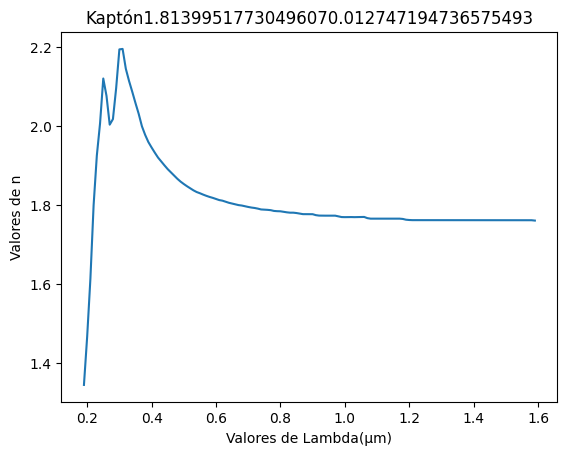

In [100]:
b = Gráfica_Índices_kaptón(lectura_YML(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Plásticos_comerciales\French.yml"))

In [101]:
def Gráfica_Índices_NOA138(Lista_de_Tuplas):
    print (Lista_de_Tuplas)
    Lambdas = []
    ns = []
    for i in range(len(Lista_de_Tuplas)):
        Lambdas.append(float(Lista_de_Tuplas[i][0]))
        ns.append(float(Lista_de_Tuplas[i][1]))
    nacumulado = 0
    xmax = ns[0]
    xmin = ns[0]
    for i in range(len(ns)):
        nacumulado += ns[i]
    npromedio = nacumulado/len(ns)
    Suma_Para_Desviación = 0
    for i in range(len(ns)):
        Suma_Para_Desviación += (ns[i] - npromedio)**2
    s = (Suma_Para_Desviación/(len(ns)-1))
    título = 'NOA138' + str(npromedio) + str(s)
    df = pd.DataFrame(data = ns, index = Lambdas, columns = ['índices de refracción'])
    df.plot(kind = "line", legend = False, xlabel="Valores de Lambda(µm)", ylabel="Valores de n")
    plt.title(título)

[('0.300', '1.3902956'), ('0.301', '1.3900723'), ('0.302', '1.3898512'), ('0.303', '1.3896320'), ('0.304', '1.3894148'), ('0.305', '1.3891995'), ('0.306', '1.3889862'), ('0.307', '1.3887748'), ('0.308', '1.3885652'), ('0.309', '1.3883575'), ('0.310', '1.3881518'), ('0.311', '1.3879478'), ('0.312', '1.3877456'), ('0.313', '1.3875451'), ('0.314', '1.3873465'), ('0.315', '1.3871496'), ('0.316', '1.3869544'), ('0.317', '1.3867610'), ('0.318', '1.3865691'), ('0.319', '1.3863790'), ('0.320', '1.3861905'), ('0.321', '1.3860037'), ('0.322', '1.3858185'), ('0.323', '1.3856348'), ('0.324', '1.3854527'), ('0.325', '1.3852721'), ('0.326', '1.3850932'), ('0.327', '1.3849157'), ('0.328', '1.3847398'), ('0.329', '1.3845654'), ('0.330', '1.3843924'), ('0.331', '1.3842208'), ('0.332', '1.3840507'), ('0.333', '1.3838820'), ('0.334', '1.3837148'), ('0.335', '1.3835490'), ('0.336', '1.3833845'), ('0.337', '1.3832214'), ('0.338', '1.3830596'), ('0.339', '1.3828992'), ('0.340', '1.3827400'), ('0.341', '1.38

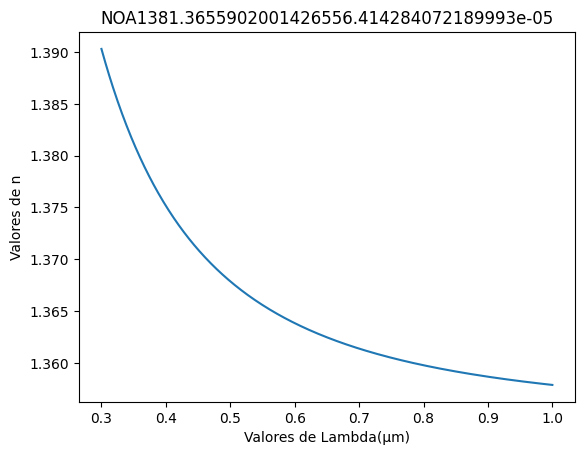

In [102]:
b = Gráfica_Índices_NOA138(lectura_YML(r"C:\Users\brune\OneDrive\Documentos\FISI2526-MetCompCompl-202320\Taller_1\Adhesivos\Iezzi2.yml"))